# About

The purpose of this notebook is to generate the shapes used in the coxeter paper figure.
Shapes are generated using fresnel.

In [1]:
import fresnel
import itertools
import math
import pandas as pd
import numpy as np
import PIL

In [2]:
device = fresnel.Device()
scene = fresnel.Scene(device)

### Convex polyhedron
The example convex polyhedron is a [truncated cube from fresnel-examples](https://github.com/glotzerlab/fresnel-examples/blob/master/01-Primitives/02-Convex-polyhedron-geometry.ipynb).

In [3]:
# first get cube verts
pm = [-1, 1]
cube_verts = list(itertools.product(pm, repeat=3))
trunc_cube_verts = []
# truncate by removing corners and adding vertices to edges
for p1, p2 in itertools.combinations(cube_verts, 2):
    # don't add points along any diagonals
    match = (p1[0]==p2[0], p1[1]==p2[1], p1[2]==p2[2])
    if match.count(False) == 1: # only 1 coordinate changes, not a diagonal
        p1, p2 = np.array(p1), np.array(p2)
        vec = p2 - p1
        trunc_cube_verts.append(p1 + vec/3)
        trunc_cube_verts.append(p1 + 2*vec/3)

In [4]:
c1 = fresnel.color.linear([0.70, 0.87, 0.54])*0.8
c2 = fresnel.color.linear([0.65,0.81,0.89])*0.8
colors = {8: c1, 3: c2}
poly_info = fresnel.util.convex_polyhedron_from_vertices(trunc_cube_verts)
for idx, fs in enumerate(poly_info['face_sides']):
    poly_info['face_color'][idx] = colors[fs]
cube = fresnel.geometry.ConvexPolyhedron(scene,
                                             poly_info,
                                             N=1
                                            )
cube.material = fresnel.material.Material(color=fresnel.color.linear([0.25,0.5,0.9]),
                                              roughness=0.8)

In [5]:
cube.position[:] = [[0, 0, 0]]
cube.orientation[:] = [[0.80777943,  0.41672122,  0.00255412,  0.41692838]]

In [6]:
cube.color[:] = fresnel.color.linear([[0, 0.9, 0]])
cube.material.primitive_color_mix = 1.0
cube.color_by_face = 1.0

### Polygons
A random set of vertices is used to show examples of both nonconvex polygons and convex spheropolygons.

In [7]:
nonconvex_polygon = fresnel.geometry.Polygon(scene,
                                    N=1,
                                    vertices=[[0, 0],
                                              [0.4, -0.4],
                                              [1, 0.2],
                                              [0.8, 1],
                                              [-0.4, 1],
                                              [-0.8, 0.4],
                                              [-0.6, -0.2]],
)
nonconvex_polygon.material.color = fresnel.color.linear([0.20,0.64,0.58])
nonconvex_polygon.material.solid=1

nonconvex_polygon.position[:] = [[3, 0]]
nonconvex_polygon.angle[:] = [0]

In [8]:
spheropolygon = fresnel.geometry.Polygon(scene,
                                    N=1,
                                    vertices=[[0.4, -0.4],
                                              [1, 0.2],
                                              [0.8, 1],
                                              [-0.4, 1],
                                              [-0.8, 0.4],
                                              [-0.6, -0.2]],
                                    rounding_radius=0.3
)
spheropolygon.material.color = fresnel.color.linear([0.20,0.34,0.88])
spheropolygon.material.solid = 1

spheropolygon.position[:] = [[9, 0]]
spheropolygon.angle[:] = [0]

### General mesh

To demonstrate a generic mesh, we triangulate an [endonuclease from the PDB](https://www.rcsb.org/structure/2voa) using [MSMS](http://mgl.scripps.edu/people/sanner/html/msms_man.html).

In [9]:
verts = pd.read_csv('tri.txt.vert', sep='\s+', header=None, index_col=None)
faces = pd.read_csv('tri.txt.face', sep='\s+', header=None, index_col=None)

# The first three columns of faces are 1-indexed indices into the
# first three columns of the verts array which are the vertex positions.
triangles = verts.to_numpy()[:, :3][faces.to_numpy()[:, :3] - 1] * 0.03

In [10]:
mesh = fresnel.geometry.Mesh(scene,
                             vertices=triangles.reshape(-1, 3),
                             N=1)
mesh.material = fresnel.material.Material(color=fresnel.color.linear([0.25,0.5,0.9]), roughness=0.6)
mesh.position[:] = [[6, -1, 0]]
mesh.orientation[:] = [[0.70710677, 0, 0, 0.70710677]]

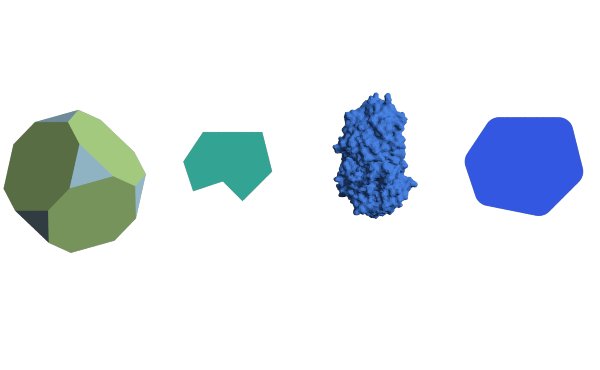

In [20]:
scene.camera = fresnel.camera.fit(scene, view='front', margin=1)
fresnel.preview(scene)

In [21]:
image = PIL.Image.fromarray(fresnel.preview(scene)[:], mode='RGBA')
image.save('shapes.png')